# **CIA** Time Series <br>

---


#**Group Members**<br>

>Aleena Mariya Sebastian(23122104)<br>

> Falak Ansari(23122106)





In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # For plotting graphs
import datetime as dt
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import seaborn as sns

In [66]:
df=pd.read_csv("BAJAJFINSV.csv")
print(df)

            Date      Symbol Series  Prev Close      Open      High       Low  \
0     26-05-2008  BAJAJFINSV     EQ     2101.05    600.00    619.00    501.00   
1     27-05-2008  BAJAJFINSV     EQ      509.10    505.00    610.95    491.10   
2     28-05-2008  BAJAJFINSV     EQ      554.65    564.00    665.60    564.00   
3     29-05-2008  BAJAJFINSV     EQ      640.95    656.65    703.00    608.00   
4     30-05-2008  BAJAJFINSV     EQ      632.40    642.40    668.00    588.30   
...          ...         ...    ...         ...       ...       ...       ...   
3196  26-04-2021  BAJAJFINSV     EQ     9916.65   9992.00  10125.00   9902.20   
3197  27-04-2021  BAJAJFINSV     EQ    10001.75  10000.00  10133.00   9964.70   
3198  28-04-2021  BAJAJFINSV     EQ    10091.35  10200.00  10615.95  10151.15   
3199  29-04-2021  BAJAJFINSV     EQ    10489.30  10540.00  11300.00  10520.00   
3200  30-04-2021  BAJAJFINSV     EQ    11176.55  11000.00  11225.00  10868.70   

          Last     Close   

In [67]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,26-05-2008,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726370e+14,908264,0.2888
1,27-05-2008,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,677627,0.1558
2,28-05-2008,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,774895,0.1689
3,29-05-2008,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982920e+14,1006161,0.2225
4,30-05-2008,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945930e+14,462832,0.1514


In [68]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
3196,26-04-2021,BAJAJFINSV,EQ,9916.65,9992.0,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194160e+14,77816,0.1855
3197,27-04-2021,BAJAJFINSV,EQ,10001.75,10000.0,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441070e+14,77723,0.2267
3198,28-04-2021,BAJAJFINSV,EQ,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163560e+15,133587,0.1199
3199,29-04-2021,BAJAJFINSV,EQ,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862820e+15,195324,0.1151
3200,30-04-2021,BAJAJFINSV,EQ,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257220e+14,129995,0.1556


In [69]:
df.shape

(3201, 14)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   Close               3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Deliverable Volume  3201 non-null   int64  
 13  %Deliverble         3201 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 350.2+ KB


In [71]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [72]:
#check for null values
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

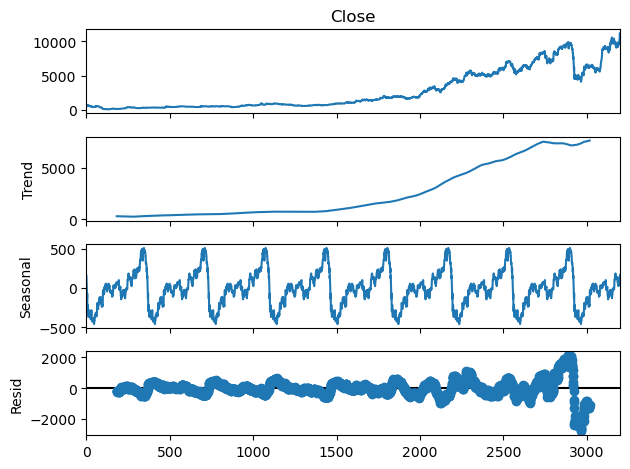

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Close'].dropna(), model='additive', period=365)
result.plot()
plt.show()

In [75]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")
        
# Example (assuming 'Close' column exists)
check_stationarity(df['Close'])

ADF Statistic: 0.565352
p-value: 0.986730
Data is non-stationary


In [76]:
# Seasonal differencing (assuming monthly data)
seasonal_diff = df['Close'] - df['Close'].shift(7)

# Drop NaN values that arise from differencing
seasonal_diff = seasonal_diff.dropna()

# Perform ADF test again on differenced data
result_diff = adfuller(seasonal_diff)

# Output the results of the seasonal differencing
print('ADF Statistic (seasonally differenced):', result_diff[0])
print('p-value (seasonally differenced):', result_diff[1])
check_stationarity(seasonal_diff)

ADF Statistic (seasonally differenced): -7.73217559865935
p-value (seasonally differenced): 1.1178342376683767e-11
ADF Statistic: -7.732176
p-value: 0.000000
Data is stationary


In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


ADF Statistic: 0.5653524010639495
p-value: 0.9867297500676576


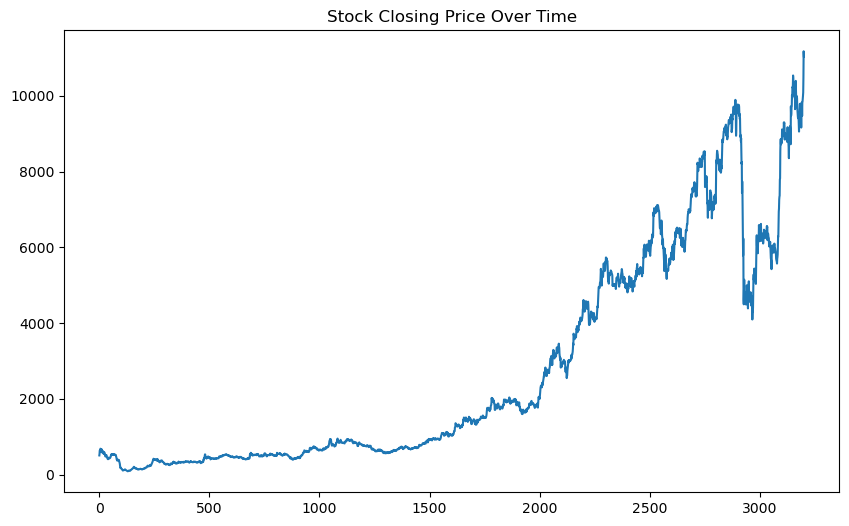

In [78]:
# We'll use the 'Close' price for forecasting
time_series = df['Close']

# Check if the data is stationary (using Augmented Dickey-Fuller test)
result = adfuller(time_series.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, the data is non-stationary, so differencing might be required
# Plot the time series data
time_series.plot(title='Stock Closing Price Over Time', figsize=(10, 6))
plt.show()

In [79]:
# Define SARIMA model (p, d, q)(P, D, Q, S) 
# (p,d,q): ARIMA terms, (P,D,Q,S): seasonal terms, where S is the seasonal period
# For example, we'll set p=1, d=1, q=1 for ARIMA, and P=1, D=1, Q=1 with seasonal period S=12 (monthly seasonality)

model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
sarima_model = model.fit(disp=False)

# Print the summary of the model
print(sarima_model.summary())

# Forecast for the next 12 periods (e.g., months)
forecast = sarima_model.forecast(steps=12)

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3201
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -18976.081
Date:                            Fri, 11 Oct 2024   AIC                          37962.162
Time:                                    10:57:43   BIC                          37992.497
Sample:                                         0   HQIC                         37973.040
                                           - 3201                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9326      0.018     50.834      0.000       0.897       0.969
ma.L1         -0.9022      0.021   

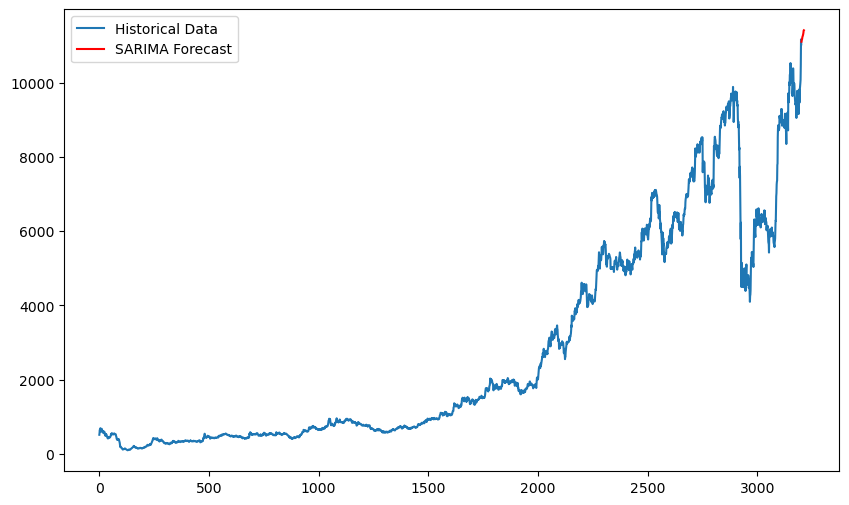

In [80]:
# Plot the forecast along with the historical data
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Historical Data')
plt.plot(forecast.index, forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.show()

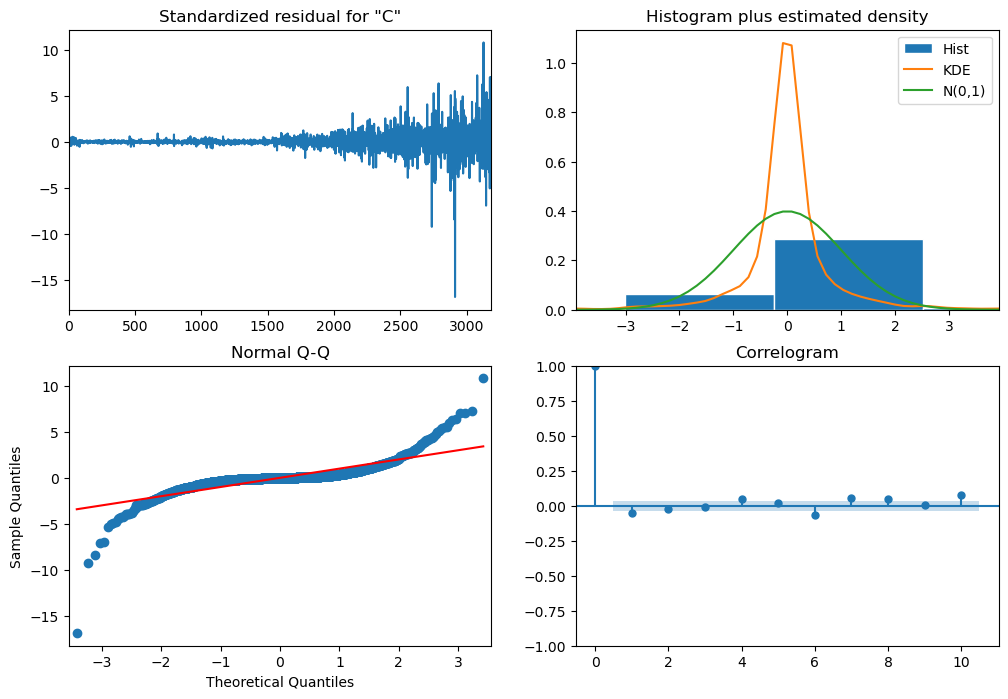

In [81]:
# Optionally, plot diagnostics to check the model
sarima_model.plot_diagnostics(figsize=(12, 8))
plt.show()

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

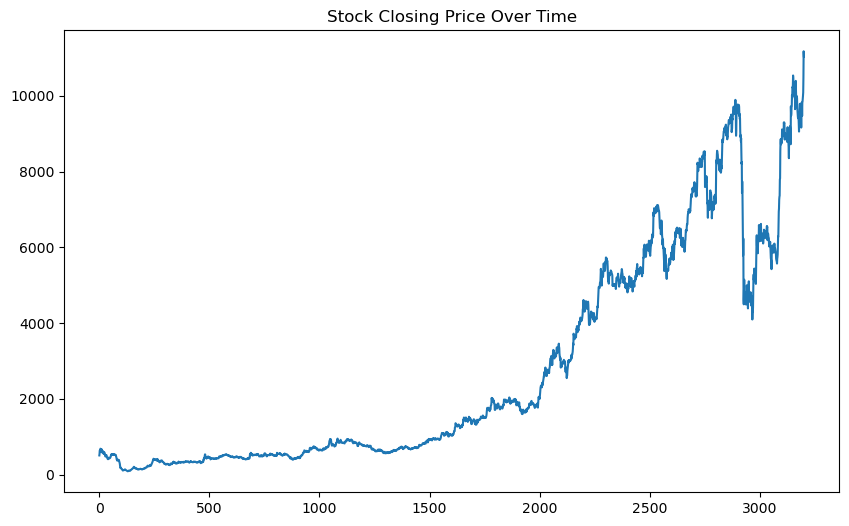

In [83]:
# We'll use the 'Close' price for forecasting
time_series = df['Close']

# Plot the time series data
time_series.plot(title='Stock Closing Price Over Time', figsize=(10, 6))
plt.show()


c:\Users\Falak Ansari\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


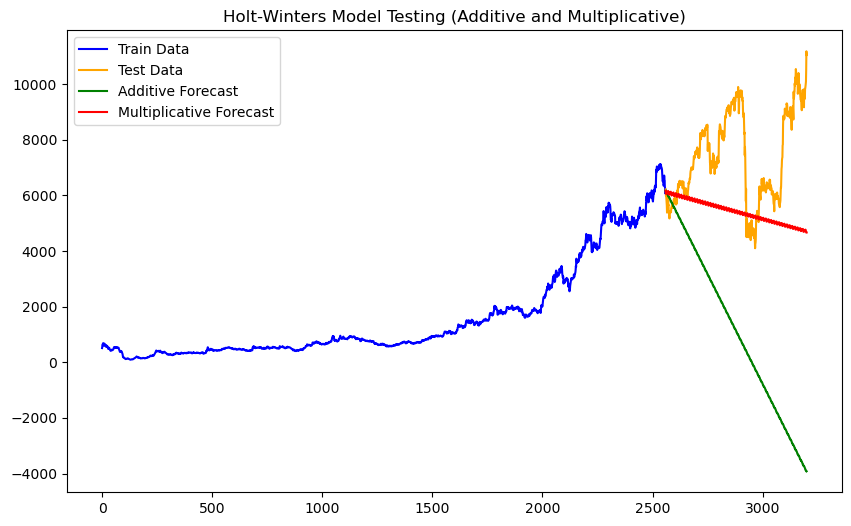

Additive Model - Mean Squared Error: 53637841.363
Additive Model - Mean Absolute Error: 6302.033
Multiplicative Model - Mean Squared Error: 7121620.042
Multiplicative Model - Mean Absolute Error: 2121.816
       Actual  Additive Forecast  Multiplicative Forecast
2560  6212.55        6161.225939              6154.465468
2561  5979.80        6140.904050              6098.280461
2562  6006.20        6115.539956              6047.224129
2563  5881.85        6126.974803              6053.395511
2564  5752.50        6116.879706              6052.047720
2565  5632.10        6101.337712              6079.240381
2566  5375.65        6077.650031              6107.092171
2567  5395.55        6073.198577              6135.312190
2568  5429.10        6046.707090              6134.150329
2569  5961.50        6023.053686              6140.139484
2570  5592.00        5989.711780              6142.535324
2571  5813.55        5990.716241              6154.813784


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Convert 'Close' to numeric and handle missing values
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Close'].fillna(df['Close'].mean(), inplace=True)

# Split data into training (80%) and test (20%) sets
train_size = int(len(df) * 0.8)
train = df['Close'][:train_size]
test = df['Close'][train_size:]

# Fit the Holt-Winters model on the training data
# Additive for seasonality and trend
hw_model_additive = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=12).fit()
# Multiplicative for increasing/decreasing seasonality
hw_model_multiplicative = ExponentialSmoothing(train, seasonal='mul', trend='add', seasonal_periods=12).fit()

# Forecast for the same length as the test set
forecast_additive = hw_model_additive.forecast(steps=len(test))
forecast_multiplicative = hw_model_multiplicative.forecast(steps=len(test))

# Plot training, testing, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, forecast_additive, label='Additive Forecast', color='green')
plt.plot(test.index, forecast_multiplicative, label='Multiplicative Forecast', color='red')
plt.legend()
plt.title('Holt-Winters Model Testing (Additive and Multiplicative)')
plt.show()

# Evaluate the model performance using MSE and MAE
mse_additive = mean_squared_error(test, forecast_additive)
mae_additive = mean_absolute_error(test, forecast_additive)

mse_multiplicative = mean_squared_error(test, forecast_multiplicative)
mae_multiplicative = mean_absolute_error(test, forecast_multiplicative)

# Print performance metrics
print(f'Additive Model - Mean Squared Error: {mse_additive:.3f}')
print(f'Additive Model - Mean Absolute Error: {mae_additive:.3f}')
print(f'Multiplicative Model - Mean Squared Error: {mse_multiplicative:.3f}')
print(f'Multiplicative Model - Mean Absolute Error: {mae_multiplicative:.3f}')
# Display actual vs predicted values for additive model
predicted_vs_actual = pd.DataFrame({'Actual': test, 'Additive Forecast': forecast_additive, 'Multiplicative Forecast': forecast_multiplicative})

# Print predicted vs actual values
print(predicted_vs_actual.head(12))  # Show the first 12 predicted values

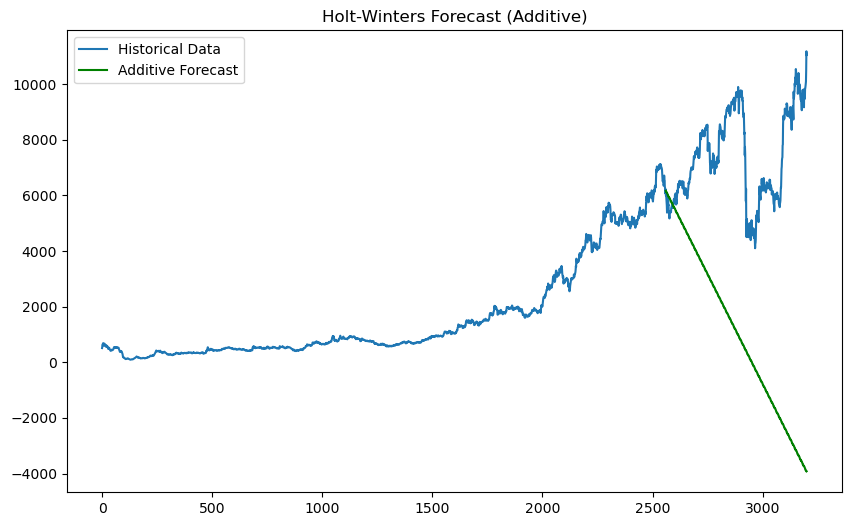

In [86]:
# Plot the historical data along with forecasts from both models
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Historical Data')
plt.plot(forecast_additive.index, forecast_additive, label='Additive Forecast', color='green')
plt.legend()
plt.title('Holt-Winters Forecast (Additive)')
plt.show()

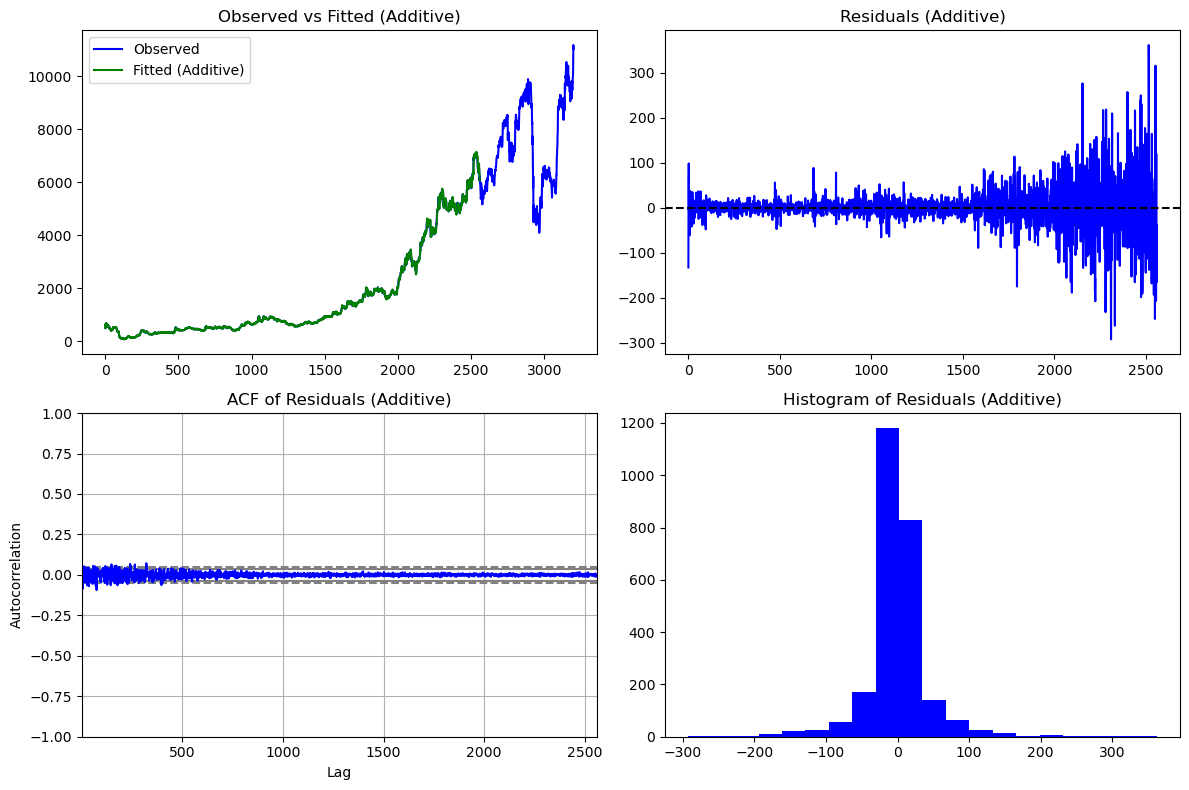

In [93]:
# Plot diagnostics for Holt-Winters model (Additive)
plt.figure(figsize=(12, 8))

# Subplot 1: Observed vs Fitted
plt.subplot(2, 2, 1)
plt.plot(time_series, label='Observed', color='blue')
plt.plot(hw_model_additive.fittedvalues, label='Fitted (Additive)', color='green')
plt.legend()
plt.title('Observed vs Fitted (Additive)')

# Subplot 2: Residuals
plt.subplot(2, 2, 2)
residuals_additive = time_series - hw_model_additive.fittedvalues
plt.plot(residuals_additive, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals (Additive)')

# Subplot 3: ACF of Residuals
plt.subplot(2, 2, 3)
pd.plotting.autocorrelation_plot(residuals_additive.dropna(), color='blue')
plt.title('ACF of Residuals (Additive)')

# Subplot 4: Distribution of Residuals
plt.subplot(2, 2, 4)
plt.hist(residuals_additive.dropna(), bins=20, color='blue')
plt.title('Histogram of Residuals (Additive)')

plt.tight_layout()
plt.show()



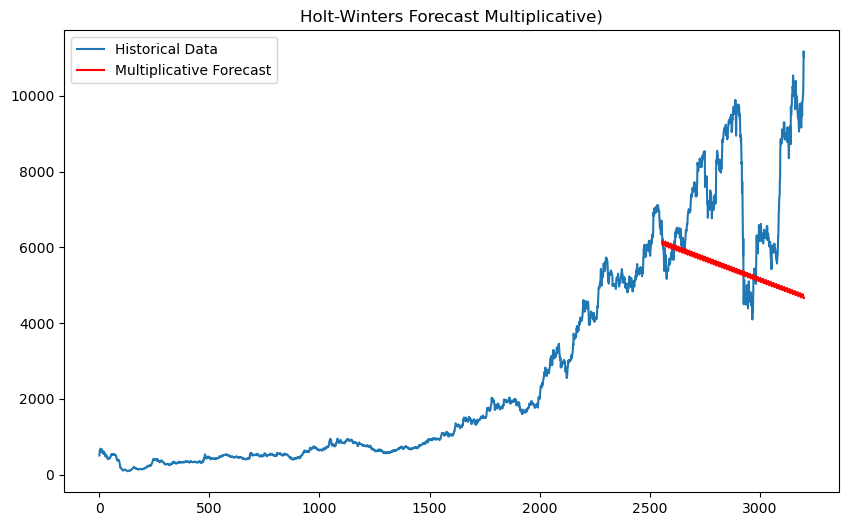

In [94]:
# Plot the historical data along with forecasts from both models
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Historical Data')
plt.plot(forecast_multiplicative.index, forecast_multiplicative, label='Multiplicative Forecast', color='red')
plt.legend()
plt.title('Holt-Winters Forecast Multiplicative)')
plt.show()

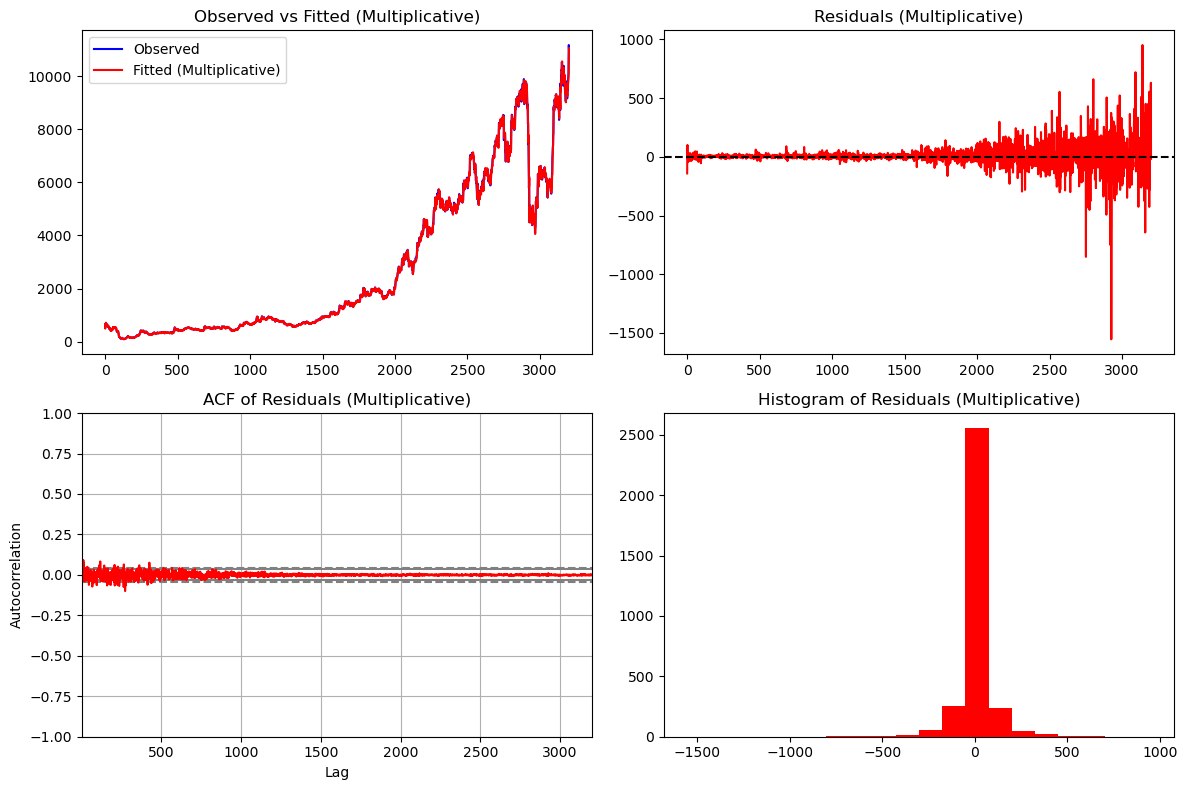

In [58]:
# Plot diagnostics for Holt-Winters model (Multiplicative)
plt.figure(figsize=(12, 8))

# Subplot 1: Observed vs Fitted
plt.subplot(2, 2, 1)
plt.plot(time_series, label='Observed', color='blue')
plt.plot(hw_model_multiplicative.fittedvalues, label='Fitted (Multiplicative)', color='red')
plt.legend()
plt.title('Observed vs Fitted (Multiplicative)')

# Subplot 2: Residuals
plt.subplot(2, 2, 2)
residuals_multiplicative = time_series - hw_model_multiplicative.fittedvalues
plt.plot(residuals_multiplicative, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals (Multiplicative)')

# Subplot 3: ACF of Residuals
plt.subplot(2, 2, 3)
pd.plotting.autocorrelation_plot(residuals_multiplicative.dropna(), color='red')
plt.title('ACF of Residuals (Multiplicative)')

# Subplot 4: Distribution of Residuals
plt.subplot(2, 2, 4)
plt.hist(residuals_multiplicative.dropna(), bins=20, color='red')
plt.title('Histogram of Residuals (Multiplicative)')

plt.tight_layout()
plt.show()

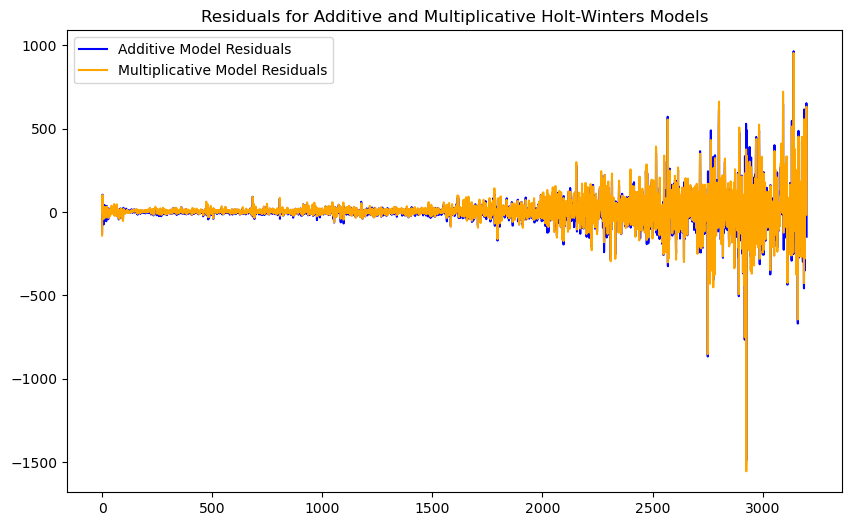

In [59]:
# Residuals: Difference between actual and predicted values for both models
residuals_additive = time_series - hw_model_additive.fittedvalues
residuals_multiplicative = time_series - hw_model_multiplicative.fittedvalues

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals_additive, label='Additive Model Residuals', color='blue')
plt.plot(residuals_multiplicative, label='Multiplicative Model Residuals', color='orange')
plt.legend()
plt.title('Residuals for Additive and Multiplicative Holt-Winters Models')
plt.show()


c:\Users\Falak Ansari\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
